In [1]:
import os
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
from bender import rsa
from bender import simtask

model_dir = '/Users/morton/Dropbox/work/bender/batch/models3'
fam_file = '/Users/morton/Dropbox/work/bender/mturk/mturk_fam.csv'

## Load Mturk familiarity ratings

In [2]:
fam = simtask.read_fam(fam_file)

In [3]:
items = fam.groupby('stim_id')[['stim', 'category', 'subcategory']].first()
items['fam'] = fam.groupby('stim_id')['response'].mean()
items

,stim,category,subcategory,fam
stim_id,,,,
0,Angelina Jolie,face,female,3.411765
1,Beyonce Knowles,face,female,3.254902
2,Britney Spears,face,female,3.470588
3,Cameron Diaz,face,female,3.117647
4,Courtney Cox,face,female,2.941176
...,...,...,...,...
115,Sierra Nevada,scene,natural,2.470588
116,Swiss Alps,scene,natural,2.372549
117,Victoria falls,scene,natural,1.960784


## Compare subcategory distributions

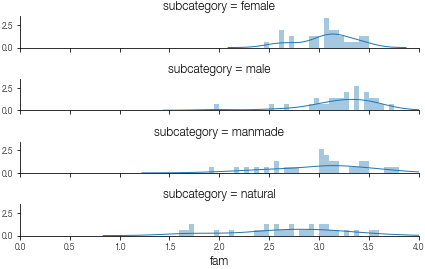

In [4]:
bins = np.arange(0, 4.01, .05)
g = sns.FacetGrid(row='subcategory', data=items, aspect=6, height=1)
g.map(sns.distplot, 'fam', bins=bins);
g.set(xlim=(0, 4));

In [5]:
dists = [x['fam'].to_numpy() for i, x in items.groupby('subcategory')]
stats.f_oneway(*dists)

F_onewayResult(statistic=8.676181319206894, pvalue=3.053814391769455e-05)

## Subsample to match familiarity

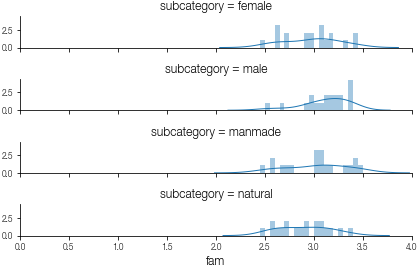

In [6]:
sample = simtask.match_fam_density(items, 'natural', 0)
g = sns.FacetGrid(row='subcategory', data=sample, aspect=6, height=1)
g.map(sns.distplot, 'fam', bins=bins);
g.set(xlim=(0, 4));

## Test new statistics

In [7]:
sample.groupby('subcategory').agg(['mean', 'std', 'min', 'max', 'count'])

fam                                    
                 mean       std       min       max count
subcategory                                              
female       2.973168  0.278466  2.490196  3.411765    19
male         3.119711  0.238441  2.509804  3.392157    19
manmade      3.027864  0.311424  2.490196  3.470588    19
natural      2.898865  0.257425  2.490196  3.352941    19

In [8]:
dists = [x['fam'].to_numpy() for i, x in sample.groupby('subcategory')]
stats.f_oneway(*dists)

F_onewayResult(statistic=2.209425467949784, pvalue=0.09434479867178194)

In [9]:
face = sample.query('category == "face"')['fam'].to_numpy()
scene = sample.query('category == "scene"')['fam'].to_numpy()
stats.ttest_ind(face, scene)

Ttest_indResult(statistic=1.3024905154114366, pvalue=0.19678788869008285)

In [10]:
sample.to_csv(os.path.join(model_dir, 'subsample.csv'))